# Demo

In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 110
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("..")

Sample text. $\mathcal{P}(x\,|\,\theta)$

In [2]:
import matplotlib.pyplot as plt
from muse_inference import muse, MuseProblem, MuseResult
import numpy as np

In [3]:
θ_true = 1

## With numpy

In [4]:
class NumpyFunnelMuseProblem(MuseProblem):
    
    def __init__(self, N):
        self.N = N
    
    def sample_x_z(self, rng, θ):
        z = rng.randn(self.N) * np.exp(θ/2)
        x = z + rng.randn(self.N)
        return (x, z)
    
    def gradθ_logLike(self, x, z, θ):
        return np.sum(z**2)/(2*np.exp(θ)) - self.N/2
    
    def logLike_and_gradz_logLike(self, x, z, θ):
        logLike = -(np.sum((x - z)**2) + np.sum(z**2) / np.exp(θ) + 512*θ) / 2
        gradz_logLike = x - z * (1 + np.exp(-θ))
        return (logLike, gradz_logLike)
    
    def grad_hess_θ_logPrior(self, θ):
        return (-θ/(3**2), -1/3**2)
    

In [5]:
prob = NumpyFunnelMuseProblem(512)
rng = np.random.RandomState(0)
(x, z) = prob.sample_x_z(rng, θ_true)
prob.x = x

In [6]:
result = MuseResult()
muse(result, prob, 0, α=0.7, rng=np.random.RandomState(3), gradz_logLike_atol=1e-4, progress=True, maxsteps=10);

  0%|          | 0/1010 [00:00<?, ?it/s]

  9%|▊         | 86/1010 [00:00<00:01, 859.27it/s]

 17%|█▋        | 172/1010 [00:00<00:01, 827.59it/s]

 25%|██▌       | 256/1010 [00:00<00:00, 829.25it/s]

 34%|███▍      | 342/1010 [00:00<00:00, 838.66it/s]

 42%|████▏     | 428/1010 [00:00<00:00, 844.01it/s]

 51%|█████     | 514/1010 [00:00<00:00, 846.75it/s]

 60%|█████▉    | 604/1010 [00:00<00:00, 863.74it/s]

 68%|██████▊   | 691/1010 [00:00<00:00, 863.51it/s]

 77%|███████▋  | 778/1010 [00:00<00:00, 853.04it/s]

 86%|████████▌ | 864/1010 [00:01<00:00, 845.61it/s]

100%|██████████| 1010/1010 [00:01<00:00, 937.49it/s]

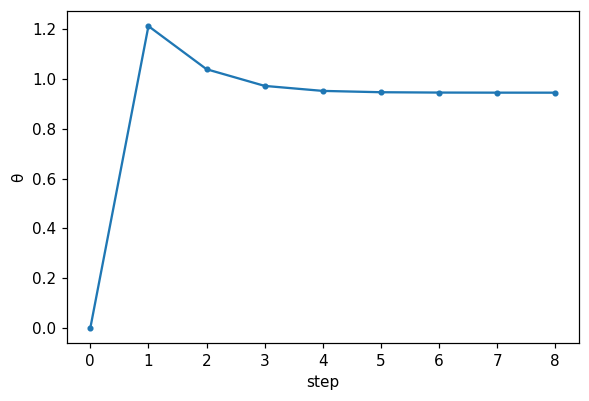

In [7]:
plt.plot([h["θ"] for h in result.history], ".-")
plt.xlabel("step")
plt.ylabel("θ");

## With Jax

In [8]:
import jax
import jax.numpy as jnp
from muse_inference.jax import JittedJaxMuseProblem

In [9]:
class JaxFunnelMuseProblem(JittedJaxMuseProblem):
    
    def __init__(self, N):
        self.N = N

    def sample_x_z(self, rng, θ):
        z = rng.randn(self.N) * np.exp(θ/2)
        x = z + rng.randn(self.N)
        return (x, z)

    def logLike(self, x, z, θ):
        return -(jnp.sum((x - z)**2) + jnp.sum(z**2) / jnp.exp(θ) + 512*θ) / 2
    
    def logPrior(self, θ):
        return -θ**2 / (2*3**2)
    

In [10]:
prob = JaxFunnelMuseProblem(512)
rng = np.random.RandomState(0)
(x, z) = prob.sample_x_z(rng, θ_true)
prob.x = x

In [11]:
result = MuseResult()
muse(result, prob, 0., α=0.7, rng=np.random.RandomState(3), gradz_logLike_atol=1e-4, progress=True, maxsteps=10);

  0%|          | 0/1010 [00:00<?, ?it/s]

  0%|          | 1/1010 [00:01<32:57,  1.96s/it]

  1%|          | 8/1010 [00:02<03:11,  5.22it/s]

  2%|▏         | 17/1010 [00:02<01:18, 12.60it/s]

  3%|▎         | 26/1010 [00:02<00:46, 20.95it/s]

  3%|▎         | 35/1010 [00:02<00:32, 29.99it/s]

  4%|▍         | 44/1010 [00:02<00:24, 38.97it/s]

  5%|▌         | 53/1010 [00:02<00:20, 47.45it/s]

  6%|▌         | 62/1010 [00:02<00:17, 55.28it/s]

  7%|▋         | 70/1010 [00:02<00:15, 60.58it/s]

  8%|▊         | 78/1010 [00:02<00:14, 63.79it/s]

  9%|▊         | 86/1010 [00:03<00:13, 67.78it/s]

  9%|▉         | 95/1010 [00:03<00:12, 72.48it/s]

 10%|█         | 104/1010 [00:05<01:16, 11.80it/s]

 11%|█         | 112/1010 [00:05<00:57, 15.53it/s]

 12%|█▏        | 120/1010 [00:05<00:43, 20.27it/s]

 13%|█▎        | 129/1010 [00:05<00:32, 26.70it/s]

 14%|█▎        | 138/1010 [00:05<00:25, 33.89it/s]

 15%|█▍        | 147/1010 [00:05<00:20, 41.75it/s]

 15%|█▌        | 156/1010 [00:05<00:17, 49.10it/s]

 16%|█▋        | 165/1010 [00:06<00:14, 56.46it/s]

 17%|█▋        | 174/1010 [00:06<00:13, 60.35it/s]

 18%|█▊        | 182/1010 [00:06<00:12, 64.76it/s]

 19%|█▉        | 190/1010 [00:06<00:12, 68.28it/s]

 20%|█▉        | 199/1010 [00:06<00:11, 73.23it/s]

 21%|██        | 208/1010 [00:06<00:12, 62.73it/s]

 21%|██▏       | 217/1010 [00:06<00:11, 67.64it/s]

 22%|██▏       | 226/1010 [00:06<00:10, 72.18it/s]

 23%|██▎       | 235/1010 [00:06<00:10, 75.28it/s]

 24%|██▍       | 244/1010 [00:07<00:09, 78.30it/s]

 25%|██▌       | 253/1010 [00:07<00:09, 79.38it/s]

 26%|██▌       | 262/1010 [00:07<00:09, 81.28it/s]

 27%|██▋       | 271/1010 [00:07<00:09, 81.69it/s]

 28%|██▊       | 280/1010 [00:07<00:09, 80.97it/s]

 29%|██▊       | 289/1010 [00:07<00:09, 75.47it/s]

 30%|██▉       | 298/1010 [00:07<00:09, 77.28it/s]

 30%|███       | 307/1010 [00:07<00:08, 79.87it/s]

 31%|███▏      | 318/1010 [00:07<00:07, 87.13it/s]

 33%|███▎      | 330/1010 [00:08<00:07, 95.31it/s]

 34%|███▍      | 341/1010 [00:08<00:06, 98.52it/s]

 35%|███▌      | 354/1010 [00:08<00:06, 105.39it/s]

 36%|███▌      | 365/1010 [00:08<00:06, 105.79it/s]

 37%|███▋      | 376/1010 [00:08<00:05, 106.31it/s]

 38%|███▊      | 388/1010 [00:08<00:05, 109.53it/s]

 40%|███▉      | 401/1010 [00:08<00:05, 113.06it/s]

 41%|████      | 413/1010 [00:08<00:05, 109.56it/s]

 42%|████▏     | 426/1010 [00:08<00:05, 113.95it/s]

 43%|████▎     | 439/1010 [00:09<00:04, 115.95it/s]

 45%|████▍     | 451/1010 [00:09<00:04, 116.78it/s]

 46%|████▌     | 464/1010 [00:09<00:04, 119.18it/s]

 47%|████▋     | 477/1010 [00:09<00:04, 120.87it/s]

 49%|████▊     | 490/1010 [00:09<00:04, 121.82it/s]

 50%|████▉     | 503/1010 [00:09<00:04, 122.89it/s]

 51%|█████     | 516/1010 [00:09<00:04, 119.44it/s]

 52%|█████▏    | 528/1010 [00:09<00:04, 117.91it/s]

 53%|█████▎    | 540/1010 [00:09<00:03, 118.27it/s]

 55%|█████▍    | 552/1010 [00:09<00:03, 116.89it/s]

 56%|█████▌    | 565/1010 [00:10<00:03, 117.88it/s]

 57%|█████▋    | 578/1010 [00:10<00:03, 119.03it/s]

 59%|█████▊    | 591/1010 [00:10<00:03, 120.58it/s]

 60%|█████▉    | 604/1010 [00:10<00:03, 120.76it/s]

 61%|██████    | 617/1010 [00:10<00:03, 113.61it/s]

 62%|██████▏   | 629/1010 [00:10<00:03, 114.71it/s]

 63%|██████▎   | 641/1010 [00:10<00:03, 112.71it/s]

 65%|██████▍   | 653/1010 [00:10<00:03, 110.38it/s]

 66%|██████▌   | 666/1010 [00:10<00:03, 113.94it/s]

 67%|██████▋   | 678/1010 [00:11<00:02, 114.27it/s]

 68%|██████▊   | 690/1010 [00:11<00:02, 114.04it/s]

 70%|██████▉   | 702/1010 [00:11<00:02, 114.32it/s]

 71%|███████   | 714/1010 [00:11<00:02, 111.65it/s]

 72%|███████▏  | 726/1010 [00:11<00:02, 112.05it/s]

 73%|███████▎  | 738/1010 [00:11<00:02, 112.64it/s]

 74%|███████▍  | 750/1010 [00:11<00:02, 109.22it/s]

 75%|███████▌  | 761/1010 [00:11<00:02, 106.07it/s]

 77%|███████▋  | 774/1010 [00:11<00:02, 111.97it/s]

 78%|███████▊  | 787/1010 [00:12<00:01, 114.59it/s]

 79%|███████▉  | 800/1010 [00:12<00:01, 117.27it/s]

 80%|████████  | 812/1010 [00:12<00:01, 114.99it/s]

 82%|████████▏ | 824/1010 [00:12<00:01, 114.89it/s]

 83%|████████▎ | 836/1010 [00:12<00:01, 113.93it/s]

 84%|████████▍ | 848/1010 [00:12<00:01, 115.35it/s]

 85%|████████▌ | 860/1010 [00:12<00:01, 114.23it/s]

 86%|████████▋ | 873/1010 [00:12<00:01, 116.18it/s]

 88%|████████▊ | 886/1010 [00:12<00:01, 118.45it/s]

 89%|████████▉ | 899/1010 [00:12<00:00, 120.32it/s]

100%|██████████| 1010/1010 [00:13<00:00, 77.19it/s]

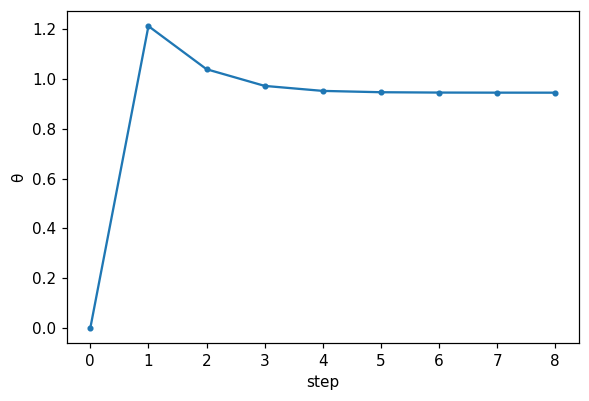

In [12]:
plt.plot([h["θ"] for h in result.history], ".-")
plt.xlabel("step")
plt.ylabel("θ");

## With PyMC

In [13]:
import pymc as pm
from muse_inference.pymc import PyMCMuseProblem

In [14]:
def gen_funnel(x=None, θ=None):
    with pm.Model() as funnel:
        θ = θ if θ else pm.Normal("θ", 0, 3)
        z = pm.Normal("z", 0, np.exp(θ / 2), size=512)
        x = pm.Normal("x", z, 1, observed=x)
    return funnel
        
x_obs = pm.sample_prior_predictive(1, model=gen_funnel(θ=θ_true)).prior.x[0,0]
funnel = gen_funnel(x_obs)
prob = PyMCMuseProblem(funnel)
prob.x = x_obs

In [15]:
result = MuseResult()
muse(result, prob, 0., α=0.7, rng=np.random.RandomState(3), gradz_logLike_atol=1e-4, progress=True, maxsteps=10);

  0%|          | 0/1010 [00:00<?, ?it/s]

  7%|▋         | 74/1010 [00:00<00:01, 738.58it/s]

 15%|█▍        | 148/1010 [00:03<00:25, 34.36it/s]

 20%|██        | 203/1010 [00:07<00:34, 23.54it/s]

 27%|██▋       | 276/1010 [00:07<00:18, 39.75it/s]

 31%|███▏      | 316/1010 [00:10<00:28, 24.63it/s]

 39%|███▉      | 392/1010 [00:10<00:15, 40.33it/s]

 43%|████▎     | 435/1010 [00:14<00:22, 25.89it/s]

 50%|█████     | 506/1010 [00:17<00:21, 23.38it/s]

 58%|█████▊    | 584/1010 [00:18<00:11, 36.20it/s]

 62%|██████▏   | 623/1010 [00:21<00:15, 24.68it/s]

 69%|██████▉   | 699/1010 [00:21<00:08, 38.18it/s]

 73%|███████▎  | 741/1010 [00:25<00:10, 25.62it/s]

 80%|████████  | 809/1010 [00:28<00:08, 23.04it/s]

 88%|████████▊ | 886/1010 [00:28<00:03, 35.17it/s]

 91%|█████████▏| 924/1010 [00:32<00:03, 24.32it/s]

 99%|█████████▉| 1001/1010 [00:32<00:00, 37.74it/s]

100%|██████████| 1010/1010 [00:32<00:00, 31.19it/s]

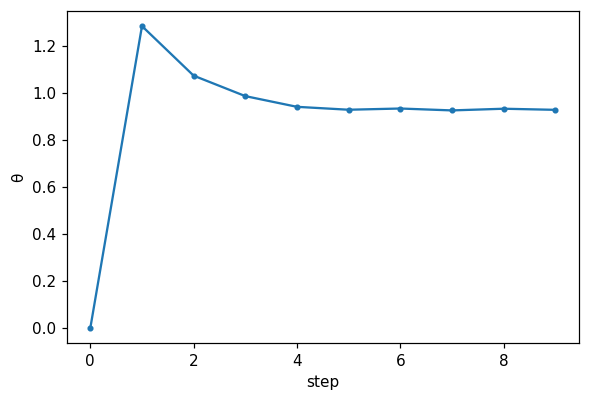

In [16]:
plt.plot([h["θ"] for h in result.history], ".-")
plt.xlabel("step")
plt.ylabel("θ");